In [84]:
import os.path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from gensim.downloader import load
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist #used to determine number of tokens
from gensim.models import Word2Vec

In [85]:
with open("goemotions.json", "r") as read_content:
    file = pd.read_json(read_content)

Taking count of all sentiment and emotion tags respectively associated with Reddit posts. Then creating a dictionary to create key-value pairings.

In [86]:
print(file.loc[file[0]=='They have THE BEST tortillas too. Made right in front of you. Mmmmmm!'])

                                                        0           1  \
264     They have THE BEST tortillas too. Made right i...     neutral   
23540   They have THE BEST tortillas too. Made right i...     neutral   
73369   They have THE BEST tortillas too. Made right i...  admiration   
86008   They have THE BEST tortillas too. Made right i...  admiration   
115605  They have THE BEST tortillas too. Made right i...    approval   

               2  
264      neutral  
23540    neutral  
73369   positive  
86008   positive  
115605  positive  


In [87]:
sentiment = file[2].value_counts().to_dict()
sentiment_values = sentiment.keys()
sentiment_frequency = sentiment.values()

In [88]:
emotion = file[1].value_counts().to_dict()
emotion_values = emotion.keys()
emotion_frequency = emotion.values()

In [89]:
# print(emotion)
# emotion_list = list(emotion_frequency)
# pdP = pd.Series(emotion_list)
# print(pdP.describe())

In [90]:
# print(sentiment)
# sentiment_list = list(sentiment_frequency)
# pdP = pd.Series(sentiment_list) 
# print(pdP.describe())

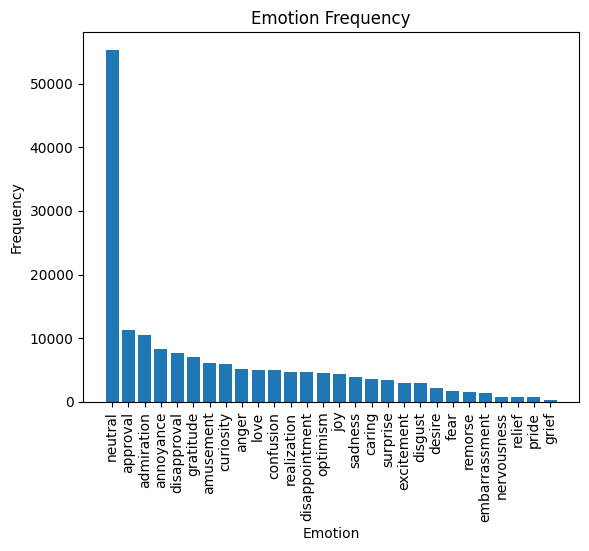

In [91]:
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.title("Emotion Frequency")
plt.xticks(rotation= 90) #done for readbility purposes
plt.bar(emotion_values, emotion_frequency)
plt.savefig("bar_emotion.png")
plt.show()

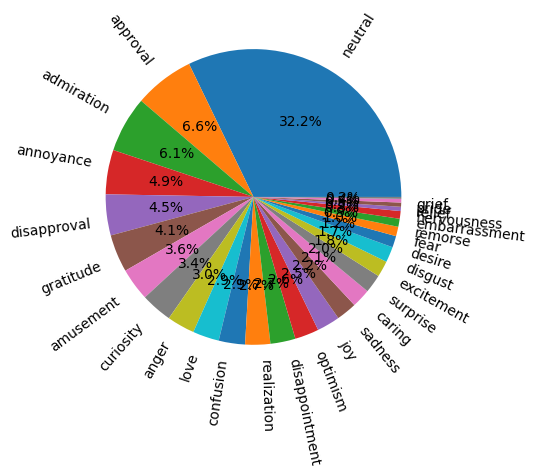

In [92]:
emotionLabels = []
sizes = []
for x, y in emotion.items():
    emotionLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=emotionLabels, rotatelabels = True, autopct ='%1.1f%%')
plt.savefig("pie_emotion.png")
plt.show()


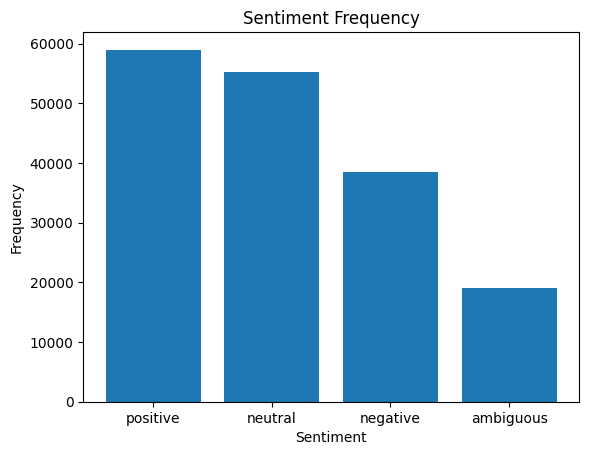

In [93]:
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Frequency")
plt.bar(sentiment_values, sentiment_frequency)
plt.savefig("bar_sentiment.png")
plt.show()

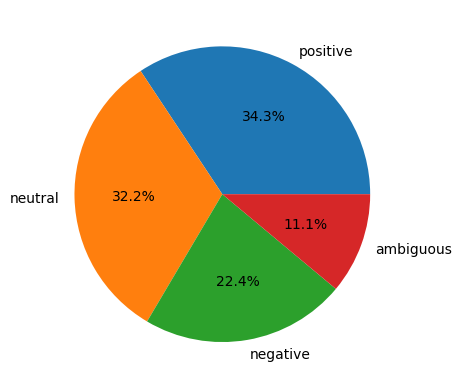

In [94]:
sentimentLabels = []
sizes = []
for x, y in sentiment.items():
    sentimentLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=sentimentLabels, autopct ='%1.1f%%')
plt.savefig("pie_sentiment.png")
plt.show()


Plotting of Frequency vs. Emotion and Frequency vs. Sentiment <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<h1>extract tokens/words</h1>

In [95]:
post = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(post)
# vectorizer.get_feature_names_out()

In [96]:
#print(f"The number of unique words is {len(X.toarray()[0])} unique words")

Given that when X.toarray() is used, the occurrences of words in a post is counted for example <br> "This document is the second document."<br> the word document is used twice [0 2 0 1 0 1 1 0 1] mapping to the array of unique words ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
<br>
Sources: <br>
https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [97]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1]) #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2]) #change 0 to the column of sentiment with no separation

<h2>2.2 Training and Test data split</h2>

In [98]:
#Question 2.2
X_train,X_test,yemo_train, yemo_test,ysent_train, ysent_test = train_test_split(X,encodedEmo,encodedSentiment, test_size = 0.2, train_size=0.8)

In [99]:
print(len(yemo_train))

137456


In [100]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(f"F1 Score (Macro): {f1_score(y_true=true_y,y_pred= prediction_y,average='macro')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

Source: https://www.delftstack.com/howto/python/how-to-get-dictionary-keys-as-a-list-in-python/

In [101]:
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2_model.pickle')):
    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Score for Emotion: 0.4387731346758235
Accuracy: 0.4387731346758235
Precision (Weighted): 0.48363666712291076
F1 Score (Weighted): 0.37126080905367825
F1 Score (Macro): 0.2246707406063204
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      2056
           1       0.63      0.38      0.48      1225
           2       0.52      0.19      0.28      1001
           3       0.41      0.15      0.22      1670
           4       0.45      0.17      0.24      2309
           5       0.45      0.11      0.18       730
           6       0.53      0.09      0.16       990
           7       0.58      0.17      0.27      1180
           8       0.43      0.03      0.06       395
           9       0.45      0.07      0.13       915
          10       0.47      0.15      0.23      1585
          11       0.58      0.11      0.18       557
          12       0.77      0.03      0.06       310
          13       0.58      0.08      0.14       614
  

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

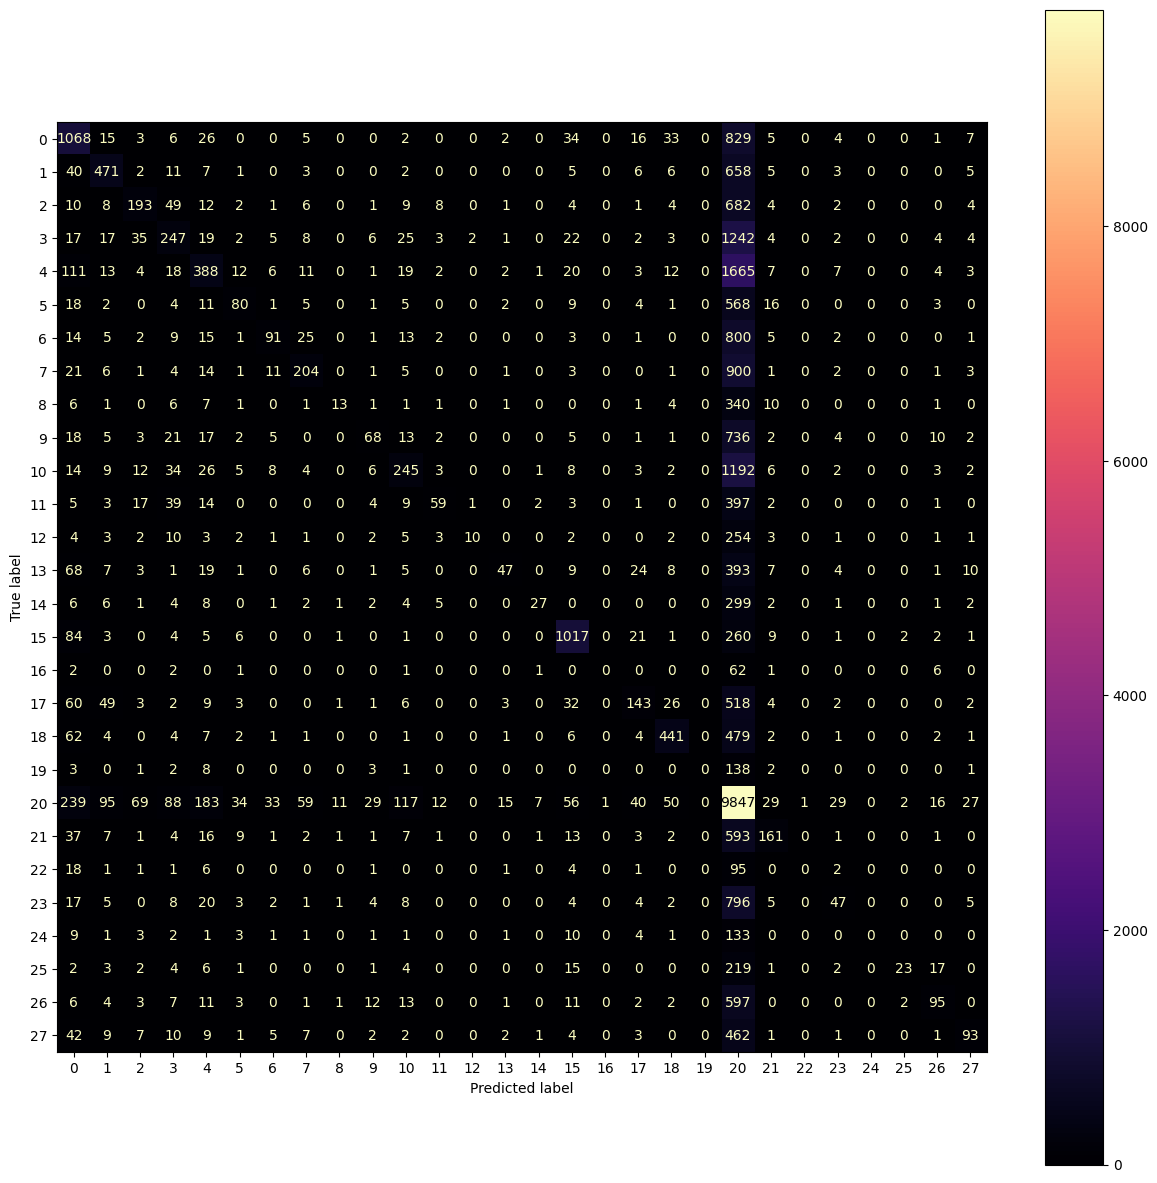

In [102]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.6080782213944826
Accuracy: 0.6080782213944826
Precision (Weighted): 0.602878177707024
F1 Score (Weighted): 0.6015574396472836
F1 Score (Macro): 0.5667686952055192
              precision    recall  f1-score   support

           0       0.54      0.32      0.40      3764
           1       0.60      0.59      0.59      7716
           2       0.57      0.57      0.57     11089
           3       0.66      0.75      0.70     11795

    accuracy                           0.61     34364
   macro avg       0.59      0.56      0.57     34364
weighted avg       0.60      0.61      0.60     34364



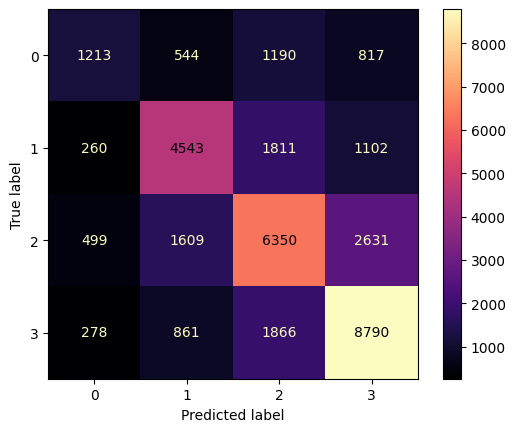

In [103]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>cross validation</h2>
<body>from sklearn.model_selection import cross_val_score</body>

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [104]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


if (os.path.exists('models/DT2_model.pickle')):

    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Score for Emotion: 0.5941392154580375
Accuracy: 0.5941392154580375
Precision (Weighted): 0.6120595882717019
F1 Score (Weighted): 0.591163865496884
F1 Score (Macro): 0.5201019191676045
              precision    recall  f1-score   support

           0       0.56      0.81      0.66      2056
           1       0.58      0.83      0.68      1225
           2       0.44      0.71      0.54      1001
           3       0.40      0.60      0.48      1670
           4       0.47      0.56      0.51      2309
           5       0.48      0.56      0.52       730
           6       0.47      0.55      0.51       990
           7       0.57      0.61      0.59      1180
           8       0.48      0.57      0.52       395
           9       0.44      0.44      0.44       915
          10       0.53      0.47      0.50      1585
          11       0.52      0.40      0.45       557
          12       0.55      0.43      0.48       310
          13       0.52      0.42      0.46       614
     

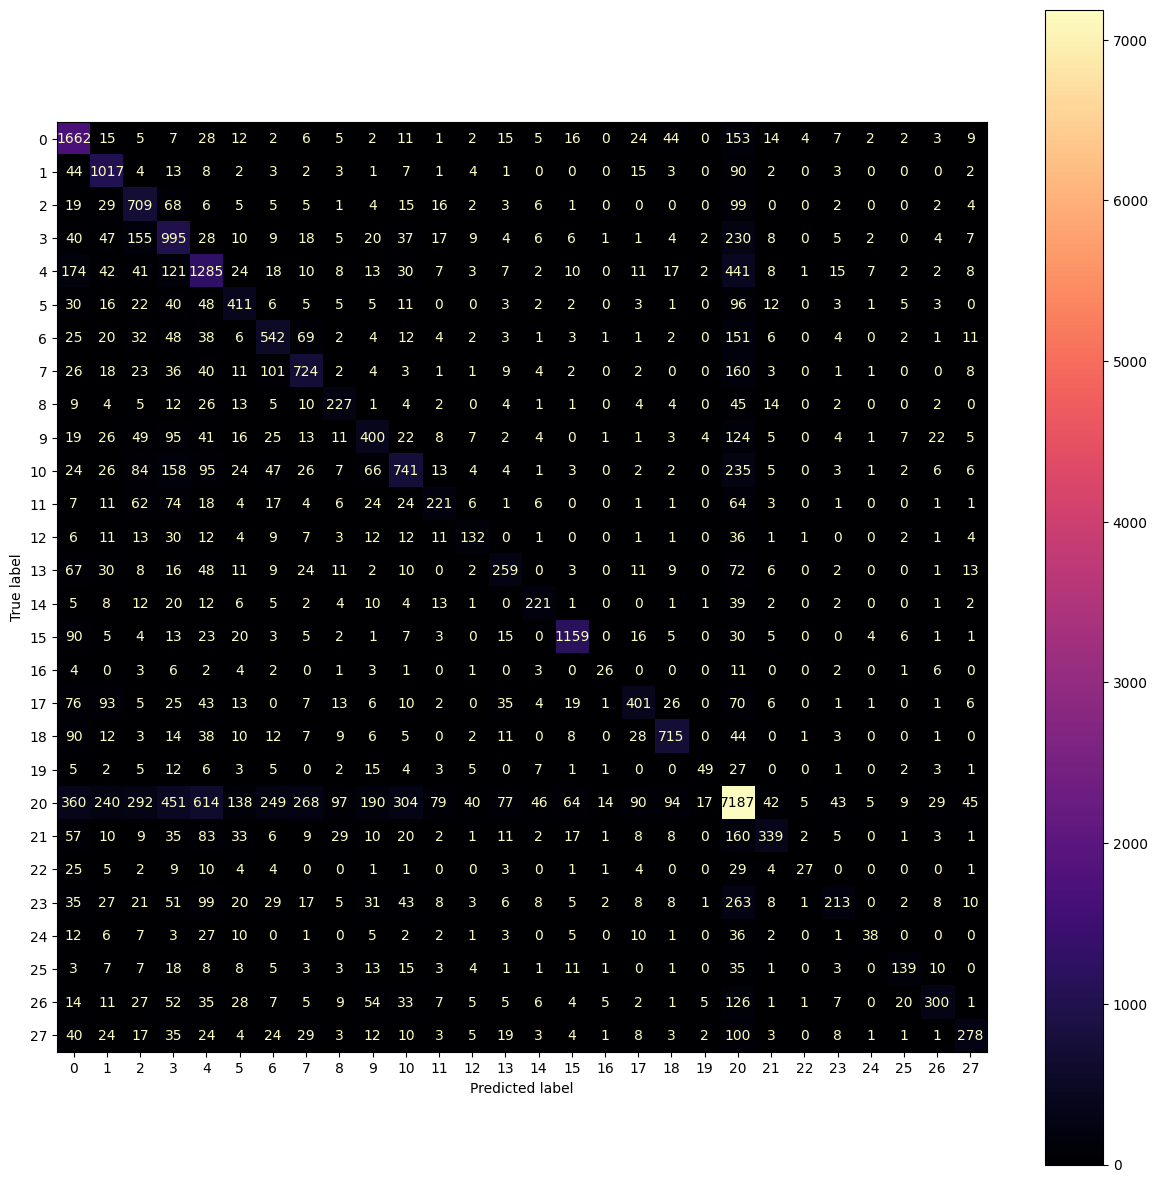

In [105]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')


Score for Sentiment: 0.7168257478756839
Accuracy: 0.7168257478756839
Precision (Weighted): 0.7283009450572606
F1 Score (Weighted): 0.7191476443326319
F1 Score (Macro): 0.7029917293268646
              precision    recall  f1-score   support

           0       0.56      0.71      0.63      3764
           1       0.67      0.78      0.72      7716
           2       0.71      0.66      0.69     11089
           3       0.84      0.73      0.78     11795

    accuracy                           0.72     34364
   macro avg       0.69      0.72      0.70     34364
weighted avg       0.73      0.72      0.72     34364



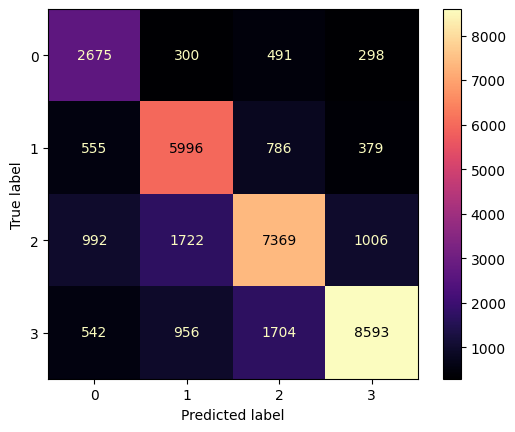

In [106]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [107]:
classifier = MLPClassifier()
if (os.path.exists('models/MLP1_model.pickle')):
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP1 = classifier.fit(X_train, yemo_train)
    with open('models/MLP1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MLP2_model.pickle')):
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP2 = classifier.fit(X_train,ysent_train)
    with open('models/MLP2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [108]:
print(np.shape(X_train))
print(np.shape(yemo_train))

(137456, 30449)
(137456,)


Score for Emotion: 0.574758468164358
Accuracy: 0.574758468164358
Precision (Weighted): 0.5676313097194383
F1 Score (Weighted): 0.5682765704482468
F1 Score (Macro): 0.500999208189638
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      2056
           1       0.63      0.67      0.65      1225
           2       0.52      0.55      0.53      1001
           3       0.44      0.39      0.42      1670
           4       0.50      0.37      0.42      2309
           5       0.49      0.44      0.47       730
           6       0.51      0.44      0.47       990
           7       0.59      0.50      0.54      1180
           8       0.44      0.54      0.49       395
           9       0.43      0.37      0.40       915
          10       0.48      0.47      0.48      1585
          11       0.48      0.42      0.45       557
          12       0.44      0.43      0.44       310
          13       0.45      0.38      0.42       614
       

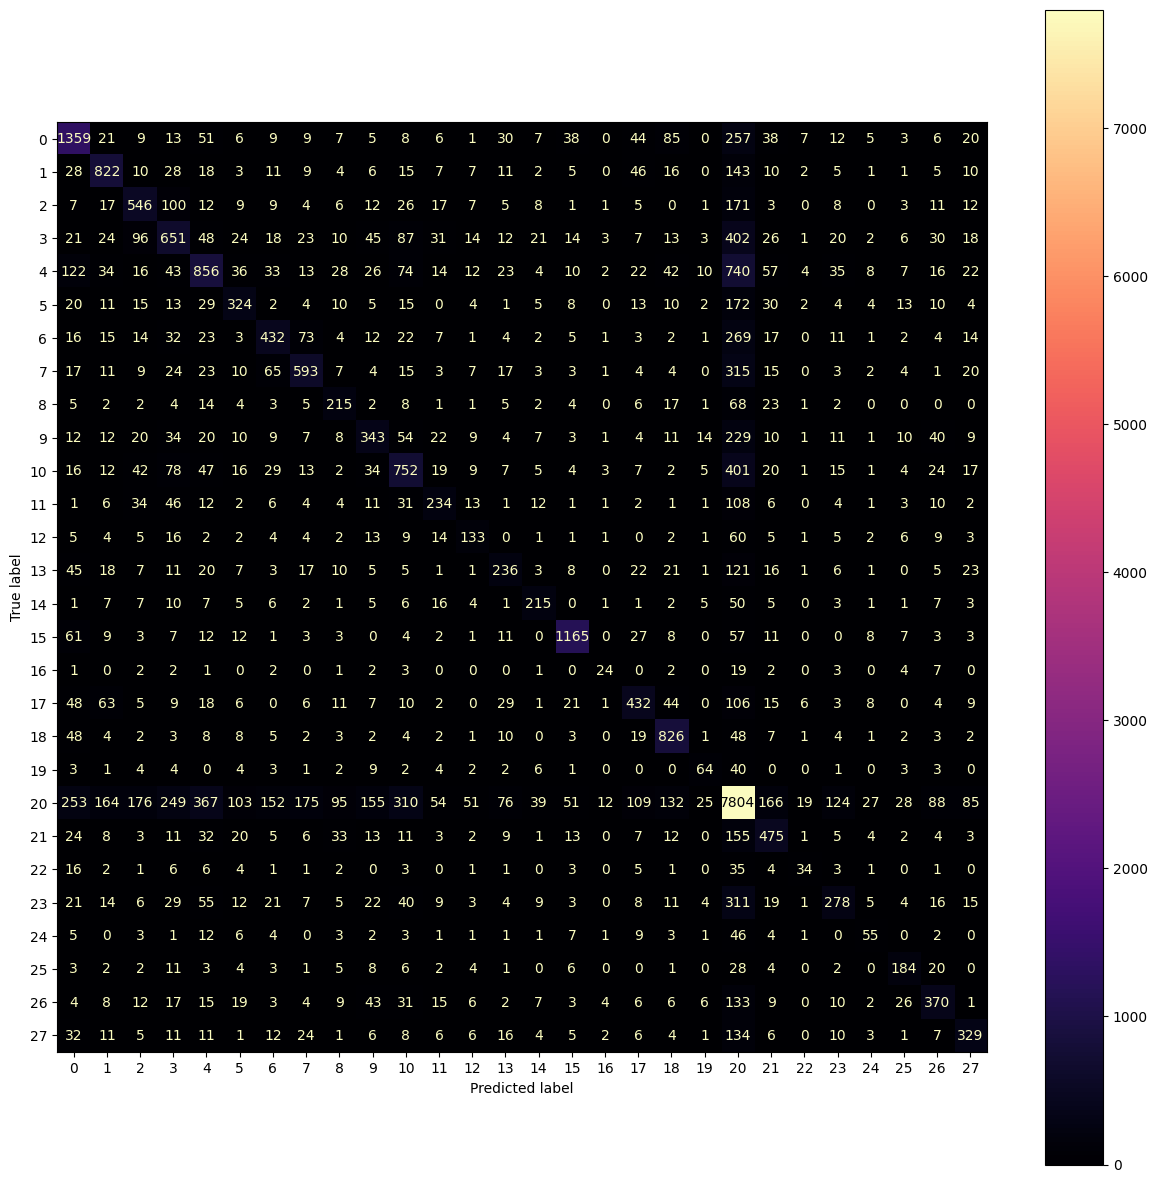

In [109]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.5584623443138168
Accuracy: 0.5584623443138168
Precision (Weighted): 0.5621721983967986
F1 Score (Weighted): 0.5427461504356653
F1 Score (Macro): 0.48133669062215545
              precision    recall  f1-score   support

           0       0.50      0.13      0.20      3764
           1       0.56      0.46      0.50      7716
           2       0.48      0.64      0.55     11089
           3       0.66      0.68      0.67     11795

    accuracy                           0.56     34364
   macro avg       0.55      0.48      0.48     34364
weighted avg       0.56      0.56      0.54     34364



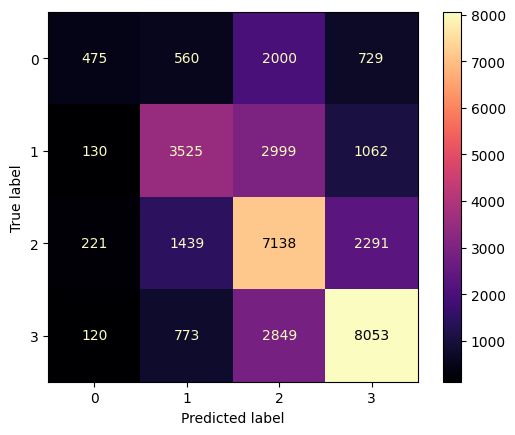

In [110]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1


In [111]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/MNB1GridCV_model.pickle')):
    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2GridCV_model.pickle')):
    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<h2>Decision Tree Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples


In [112]:
parameters = {"criterion":("gini","entropy"),"max_depth":(100,3),"min_samples_split":(12,5,30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/DT1GridCV_model.pickle')):
    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/DT2GridCV_model.pickle')):
    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.4044639513068846
Accuracy: 0.5052089395879409
Precision (Weighted): 0.5078778237522475
F1 Score (Weighted): 0.46426687442729786
F1 Score (Macro): 0.3632624441414248
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      2056
           1       0.61      0.68      0.65      1225
           2       0.47      0.34      0.40      1001
           3       0.37      0.20      0.26      1670
           4       0.44      0.19      0.26      2309
           5       0.41      0.20      0.27       730
           6       0.49      0.25      0.33       990
           7       0.53      0.27      0.36      1180
           8       0.45      0.28      0.35       395
           9       0.45      0.17      0.25       915
          10       0.45      0.21      0.29      1585
          11       0.52      0.24      0.33       557
          12       0.43      0.

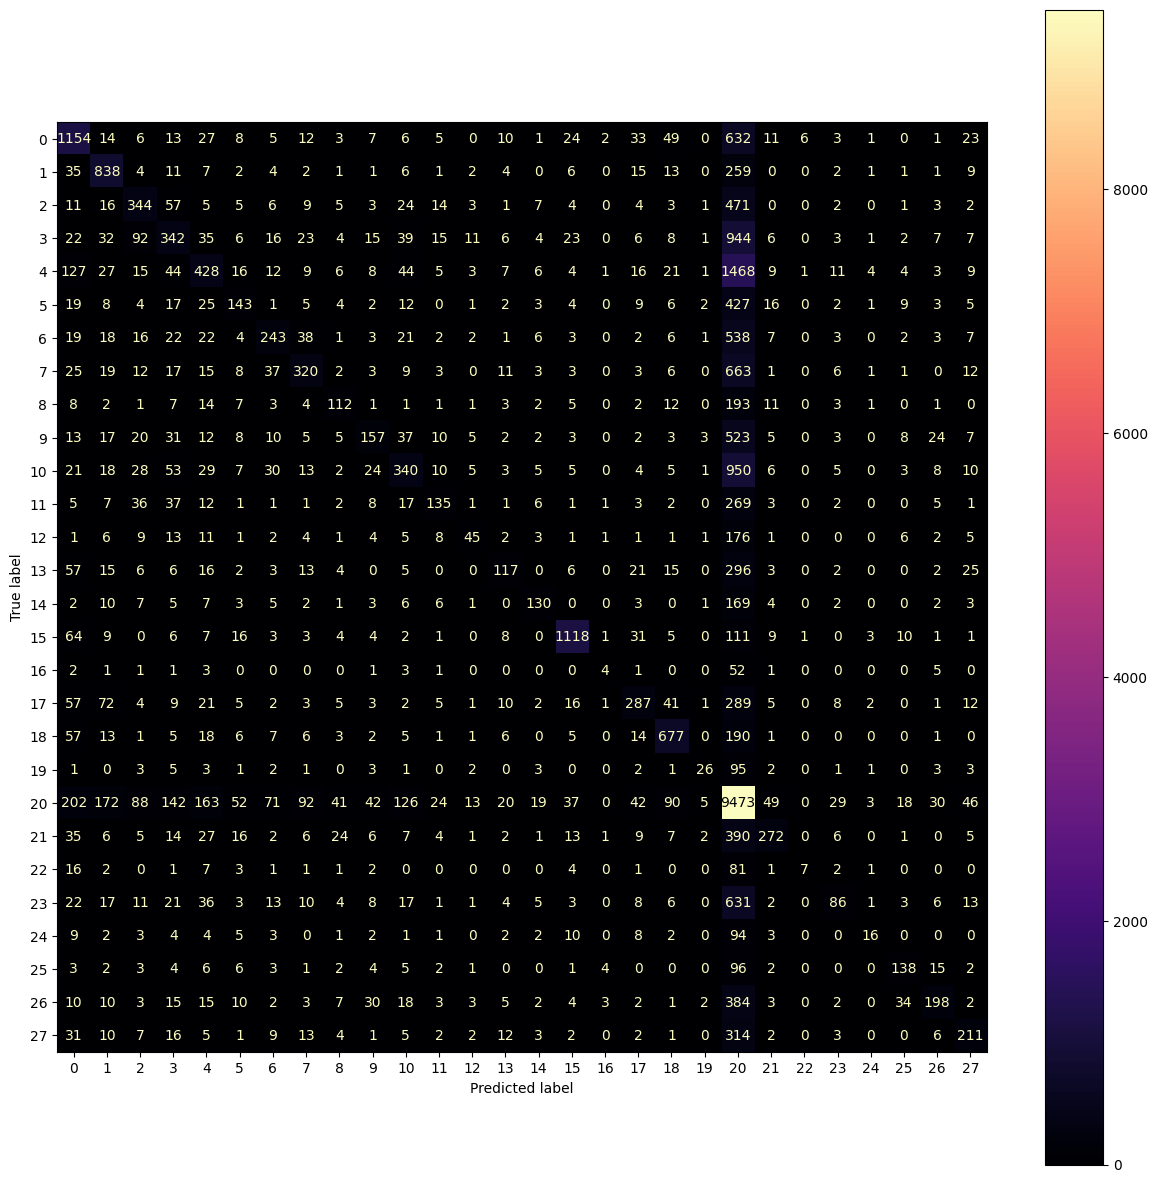

In [113]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.515219404662324
Accuracy: 0.6166918868583401
Precision (Weighted): 0.6626647053807109
F1 Score (Weighted): 0.6188244566208017
F1 Score (Macro): 0.5932377923143072
              precision    recall  f1-score   support

           0       0.53      0.45      0.49      3764
           1       0.69      0.50      0.58      7716
           2       0.50      0.78      0.61     11089
           3       0.84      0.59      0.69     11795

    accuracy                           0.62     34364
   macro avg       0.64      0.58      0.59     34364
weighted avg       0.66      0.62      0.62     34364



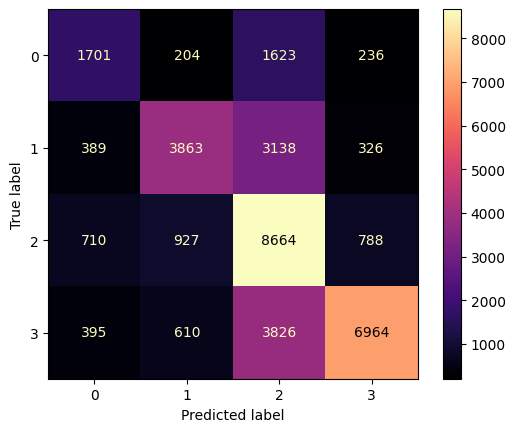

In [114]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [115]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True, verbose=True,max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters,n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/MLP1GridCV_model.pickle')):
        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/MLP1GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/MLP2GridCV_model.pickle')):
        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/MLP2GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


Accuracy: 0.45666977069025727
Precision (Weighted): 0.412273468353947
F1 Score (Weighted): 0.3768307736269842
F1 Score (Macro): 0.23891301986769906
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      2056
           1       0.55      0.69      0.61      1225
           2       0.40      0.26      0.31      1001
           3       0.18      0.04      0.07      1670
           4       0.38      0.09      0.15      2309
           5       0.33      0.00      0.00       730
           6       0.48      0.12      0.19       990
           7       0.48      0.18      0.26      1180
           8       0.56      0.09      0.15       395
           9       0.00      0.00      0.00       915
          10       0.28      0.10      0.15      1585
          11       0.53      0.04      0.08       557
          12       0.00      0.00      0.00       310
          13       0.66      0.04      0.08       614
          14       0.53      0.37      0.

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

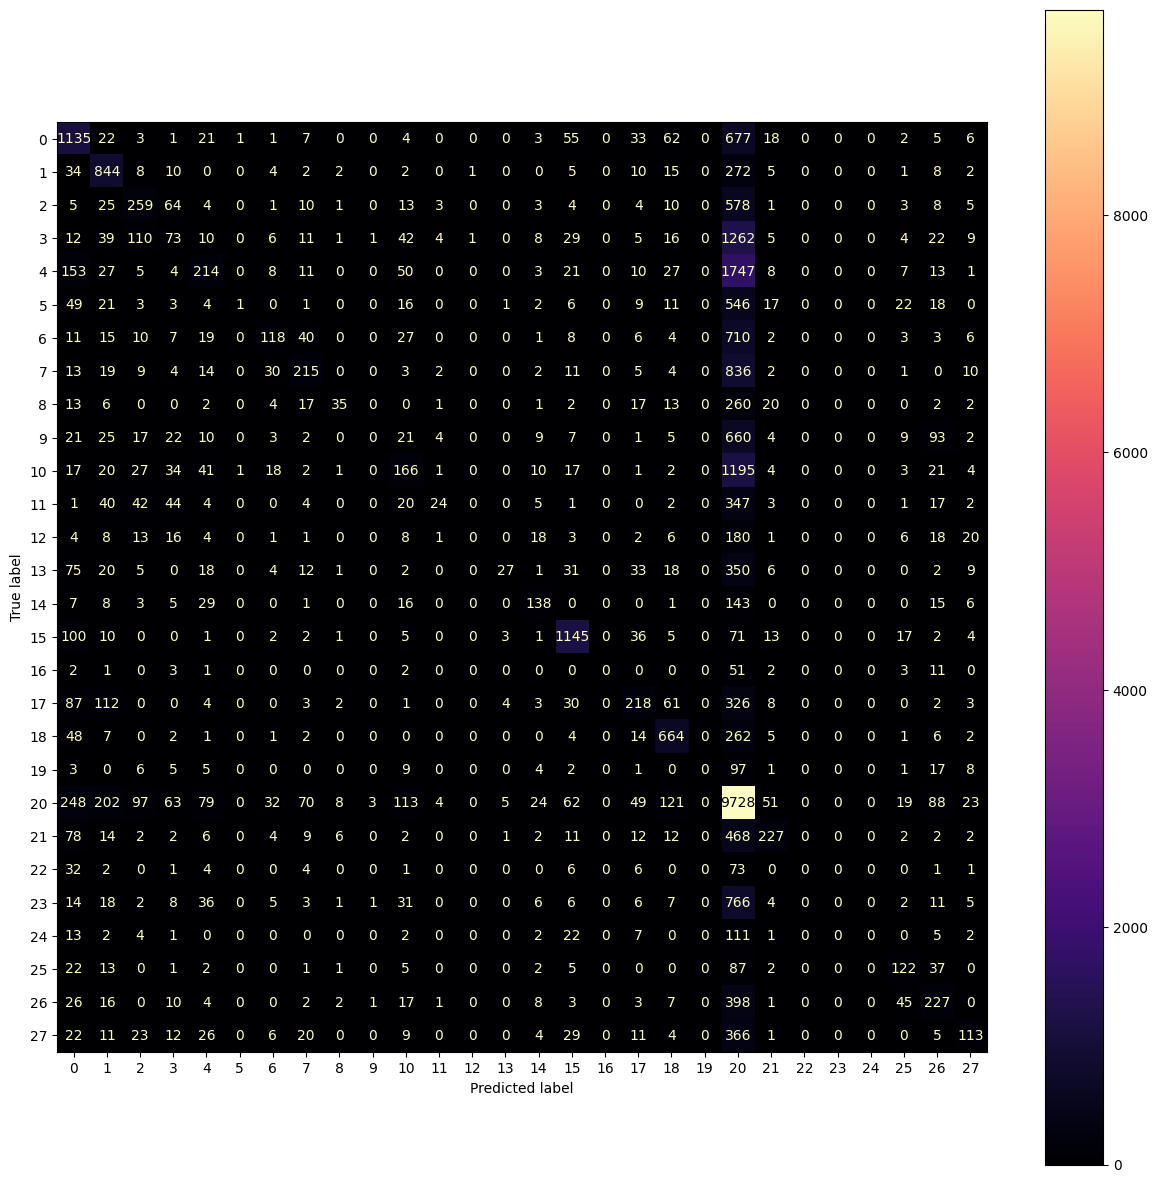

In [116]:
if (os.path.exists('models/MLP1GridCV_model.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6309218950064021
Precision (Weighted): 0.6291010411781977
F1 Score (Weighted): 0.6251974898406218
F1 Score (Macro): 0.5883181378720364
              precision    recall  f1-score   support

           0       0.58      0.33      0.42      3764
           1       0.63      0.59      0.61      7716
           2       0.57      0.63      0.60     11089
           3       0.70      0.75      0.73     11795

    accuracy                           0.63     34364
   macro avg       0.62      0.58      0.59     34364
weighted avg       0.63      0.63      0.63     34364

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=5, verbose=True), Best Score: 0.5612705192148834


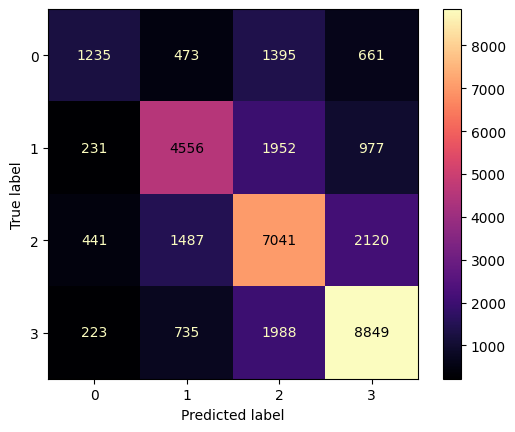

In [117]:
if (os.path.exists('models/MLP2GridCV_model.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>2.5</h3>
Test/Training split: 80/20 -> 50/50
Anticipated effect: increased accuracy but poor generalization


In [118]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1])  #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2])  #change 0 to the column of sentiment with no separation



In [119]:
X_train, X_test, yemo_train, yemo_test, ysent_train, ysent_test = train_test_split(X, encodedEmo, encodedSentiment,test_size=0.5, train_size=0.5)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html) using new test train split</h2>

In [120]:
classifier = MultinomialNB()
if (os.path.exists('models/new_split/MNB1_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")

else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


Score for Emotion: 0.4492841345594227
Accuracy: 0.4492841345594227
Precision (Weighted): 0.49100259997737233
F1 Score (Weighted): 0.3899580342600008
F1 Score (Macro): 0.24886355579798952
              precision    recall  f1-score   support

           0       0.53      0.54      0.54      5286
           1       0.61      0.42      0.50      3071
           2       0.51      0.21      0.30      2602
           3       0.41      0.16      0.23      4150
           4       0.47      0.19      0.27      5638
           5       0.45      0.14      0.21      1738
           6       0.55      0.14      0.22      2439
           7       0.53      0.18      0.27      2916
           8       0.63      0.08      0.14      1066
           9       0.51      0.10      0.16      2345
          10       0.44      0.17      0.25      3788
          11       0.54      0.14      0.22      1437
          12       0.60      0.04      0.07       707
          13       0.55      0.09      0.15      1504
  

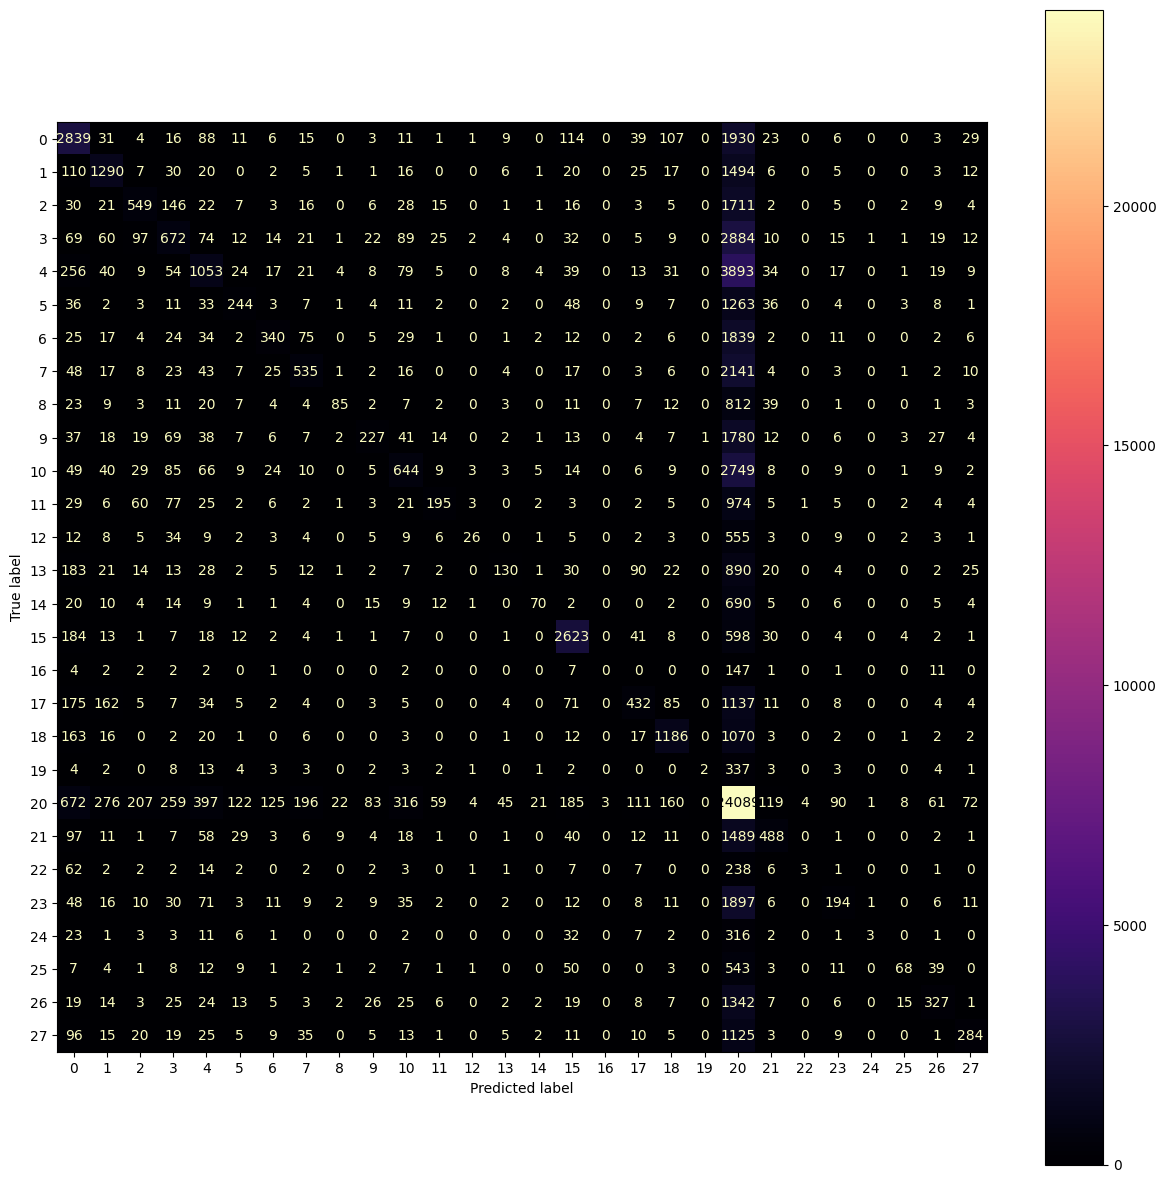

In [121]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.6143056687230823
Accuracy: 0.6143056687230823
Precision (Weighted): 0.6093686611341471
F1 Score (Weighted): 0.6084747559692719
F1 Score (Macro): 0.5763860560008136
              precision    recall  f1-score   support

           0       0.55      0.35      0.42      9447
           1       0.61      0.61      0.61     19167
           2       0.58      0.57      0.57     27707
           3       0.66      0.75      0.70     29589

    accuracy                           0.61     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.61      0.61     85910



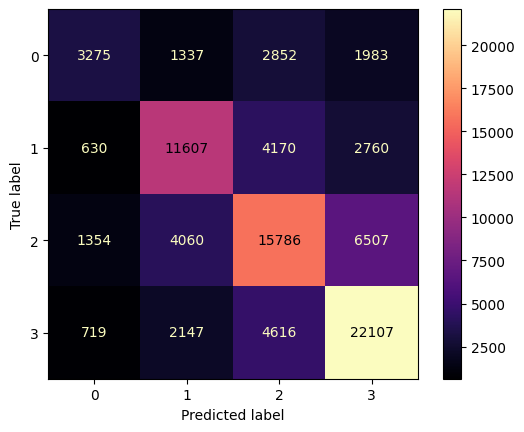

In [122]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Decision Tree (tree.DecisionTreeClassifier) using new test train split</h2>

In [123]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/new_split/DT1_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


Score for Emotion: 0.6182749388895356
Accuracy: 0.6182749388895356
Precision (Weighted): 0.62853352969999
F1 Score (Weighted): 0.6129585191380815
F1 Score (Macro): 0.5343872073766939
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      5286
           1       0.59      0.83      0.69      3071
           2       0.47      0.70      0.56      2602
           3       0.43      0.57      0.49      4150
           4       0.48      0.54      0.51      5638
           5       0.48      0.57      0.52      1738
           6       0.52      0.56      0.54      2439
           7       0.60      0.61      0.61      2916
           8       0.54      0.52      0.53      1066
           9       0.49      0.44      0.46      2345
          10       0.55      0.49      0.52      3788
          11       0.58      0.40      0.47      1437
          12       0.57      0.41      0.48       707
          13       0.57      0.42      0.49      1504
      

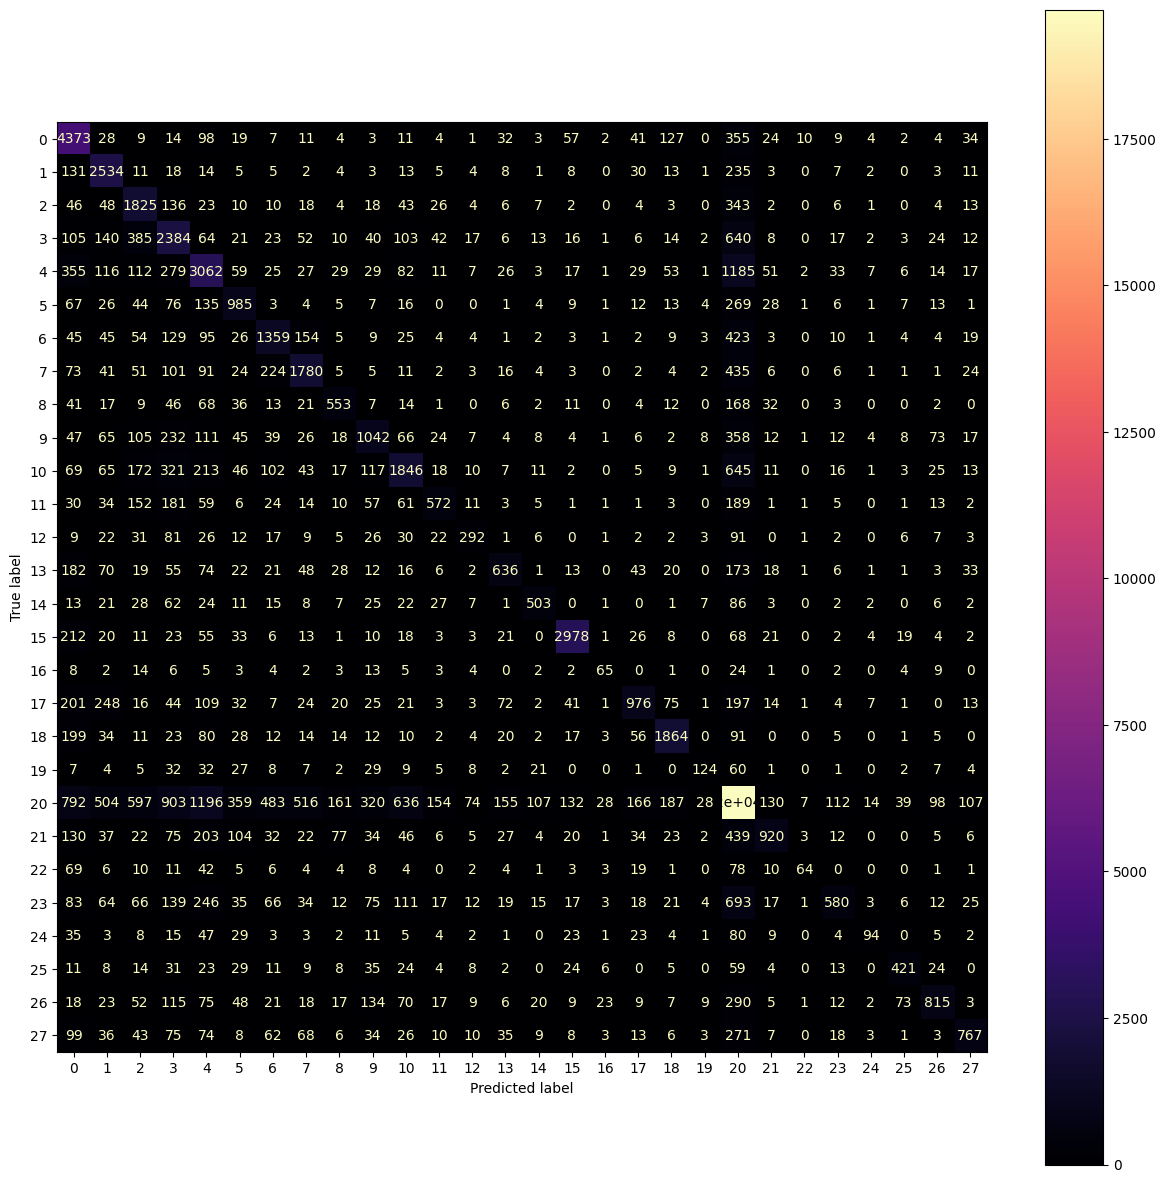

In [124]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.738226050517984
Accuracy: 0.738226050517984
Precision (Weighted): 0.7456848329864871
F1 Score (Weighted): 0.7399327451280453
F1 Score (Macro): 0.7238284670237516
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      9447
           1       0.69      0.79      0.74     19167
           2       0.73      0.70      0.71     27707
           3       0.84      0.76      0.80     29589

    accuracy                           0.74     85910
   macro avg       0.72      0.74      0.72     85910
weighted avg       0.75      0.74      0.74     85910



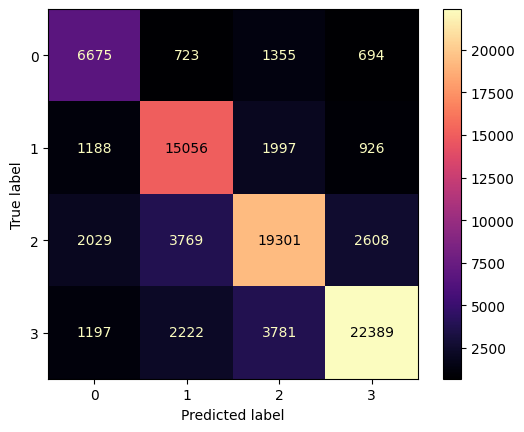

In [125]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) using new test train split</h2>

<b>Did not converge timed out</b>

In [126]:
classifier = MLPClassifier()
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP1 = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP2 = classifier.fit(X_train, ysent_train)
        with open('models/new_split/MLP2_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


Score for Emotion: 0.5959026888604353
Accuracy: 0.5959026888604353
Precision (Weighted): 0.5876225926897861
F1 Score (Weighted): 0.5873975087276136
F1 Score (Macro): 0.519601437891798
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      5286
           1       0.65      0.69      0.67      3071
           2       0.57      0.47      0.52      2602
           3       0.48      0.39      0.43      4150
           4       0.54      0.37      0.44      5638
           5       0.50      0.47      0.49      1738
           6       0.57      0.40      0.47      2439
           7       0.58      0.56      0.57      2916
           8       0.46      0.53      0.50      1066
           9       0.49      0.35      0.41      2345
          10       0.51      0.46      0.48      3788
          11       0.49      0.45      0.47      1437
          12       0.41      0.51      0.46       707
          13       0.50      0.43      0.46      1504
     

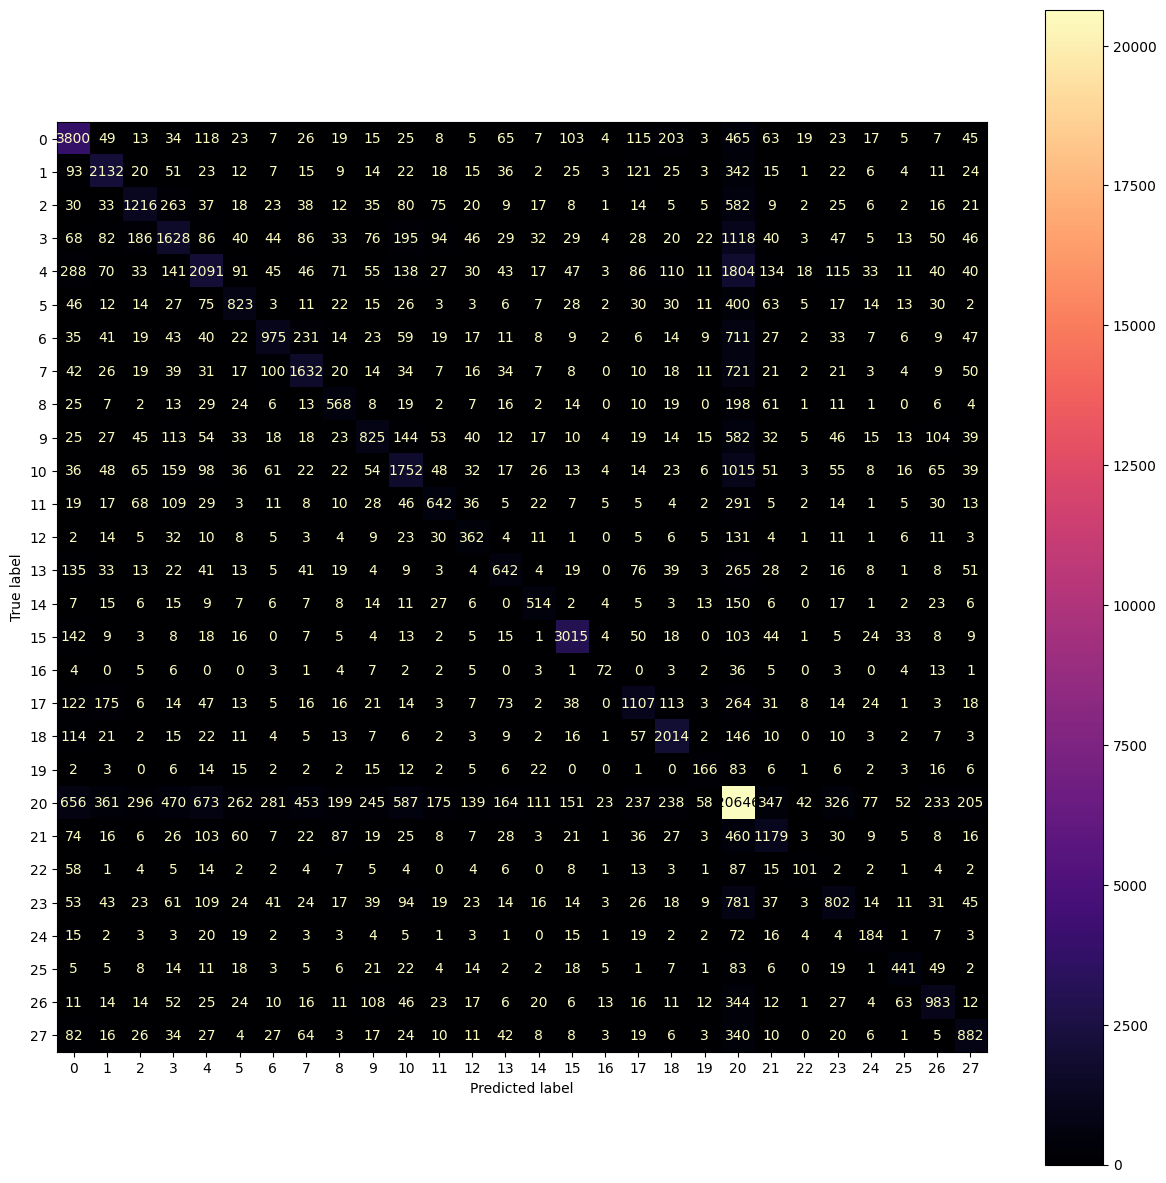

In [127]:

if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.predict(X_test)
    print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
    metrics(yemo_test, y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
    fig, ax = plt.subplots(figsize=(15, 15))
    cmp.plot(ax=ax, cmap='magma')
else:
    print("skipped")

Score for Sentiment: 0.7251076708182982
Accuracy: 0.7251076708182982
Precision (Weighted): 0.7241267419958632
F1 Score (Weighted): 0.7243161068552094
F1 Score (Macro): 0.7036868220666678
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      9447
           1       0.70      0.73      0.72     19167
           2       0.70      0.69      0.70     27707
           3       0.79      0.80      0.79     29589

    accuracy                           0.73     85910
   macro avg       0.71      0.70      0.70     85910
weighted avg       0.72      0.73      0.72     85910



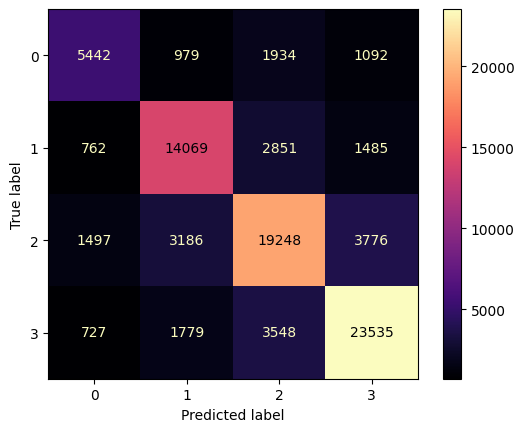

In [128]:
if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.predict(X_test)

    print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
    metrics(ysent_test, y_sent_predict)
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1

In [129]:
parameters = {"alpha": (0.5, 0, 0.36, 1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/MNB1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Best estimator (Emotion): MultinomialNB(alpha=0.5), Best Score: 0.3905984755012737
Accuracy: 0.4858922127808171
Precision (Weighted): 0.4870809287552838
F1 Score (Weighted): 0.45509915897370845
F1 Score (Macro): 0.3439507494626194
              precision    recall  f1-score   support

           0       0.53      0.61      0.57      5286
           1       0.59      0.59      0.59      3071
           2       0.49      0.34      0.40      2602
           3       0.39      0.23      0.29      4150
           4       0.44      0.24      0.31      5638
           5       0.39      0.28      0.33      1738
           6       0.48      0.26      0.33      2439
           7       0.49      0.30      0.37      2916
           8       0.53      0.20      0.29      1066
           9       0.46      0.19      0.27      2345
          10       0.41      0.27      0.33      3788
          11       0.50      0.25      0.33      1437
          12       0.61      0.15      0.24       707
          13

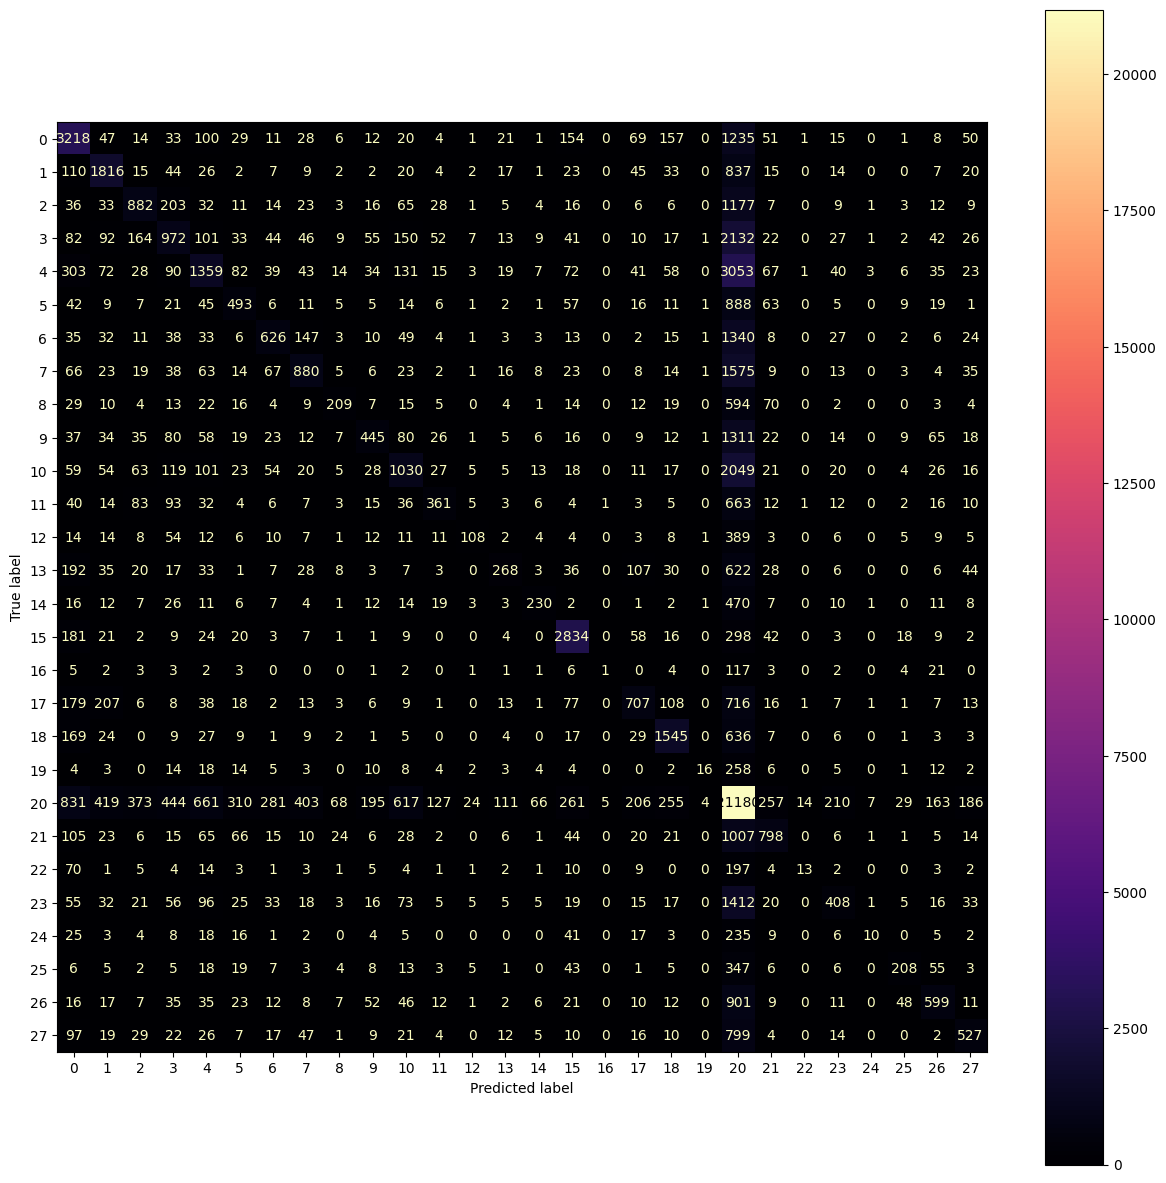

In [130]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): MultinomialNB(alpha=1), Best Score: 0.543696292227927
Accuracy: 0.6143056687230823
Precision (Weighted): 0.6093686611341471
F1 Score (Weighted): 0.6084747559692719
F1 Score (Macro): 0.5763860560008136
              precision    recall  f1-score   support

           0       0.55      0.35      0.42      9447
           1       0.61      0.61      0.61     19167
           2       0.58      0.57      0.57     27707
           3       0.66      0.75      0.70     29589

    accuracy                           0.61     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.61      0.61     85910



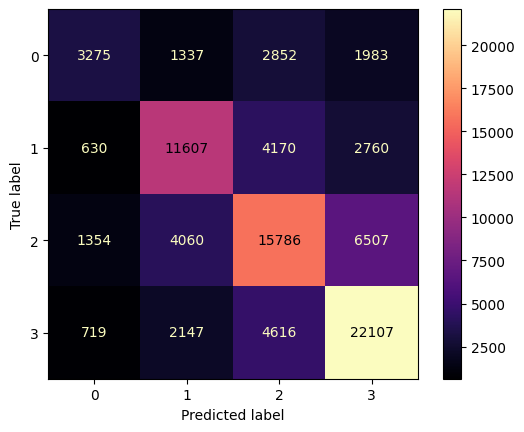

In [131]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>DecisionTree Classifier found using GridSearchCV and new test train split </h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples

In [132]:
parameters = {"criterion": ("gini", "entropy"), "max_depth": (100, 3), "min_samples_split": (12, 5, 30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/DT1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.3984285880572692
Accuracy: 0.4703876149458736
Precision (Weighted): 0.4603402805127304
F1 Score (Weighted): 0.42478343337516183
F1 Score (Macro): 0.3198562581368155
              precision    recall  f1-score   support

           0       0.54      0.51      0.53      5286
           1       0.57      0.58      0.57      3071
           2       0.44      0.26      0.32      2602
           3       0.31      0.17      0.22      4150
           4       0.34      0.15      0.21      5638
           5       0.37      0.15      0.22      1738
           6       0.41      0.21      0.28      2439
           7       0.46      0.22      0.30      2916
           8       0.44      0.27      0.33      1066
           9       0.34      0.13      0.19      2345
          10       0.34      0.16      0.21      3788
          11       0.41      0.20      0.27      1437
          12       0.49      0.

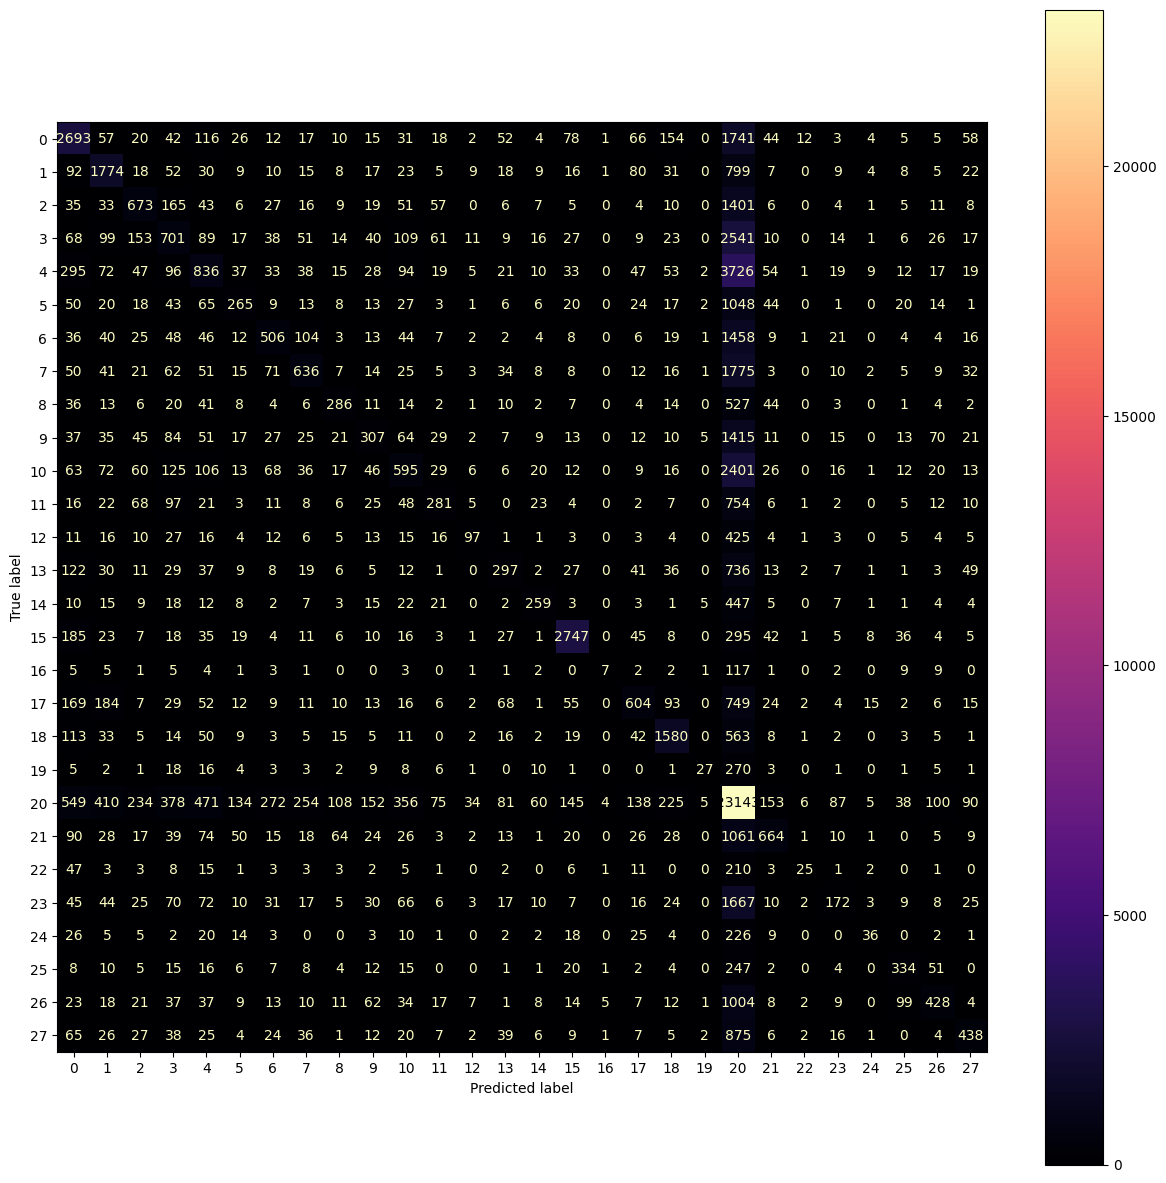

In [133]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.49976719823070653
Accuracy: 0.5856361308345943
Precision (Weighted): 0.6304981626786575
F1 Score (Weighted): 0.5839293411094593
F1 Score (Macro): 0.55018914070653
              precision    recall  f1-score   support

           0       0.52      0.34      0.41      9447
           1       0.65      0.45      0.53     19167
           2       0.48      0.78      0.59     27707
           3       0.80      0.57      0.66     29589

    accuracy                           0.59     85910
   macro avg       0.61      0.54      0.55     85910
weighted avg       0.63      0.59      0.58     85910



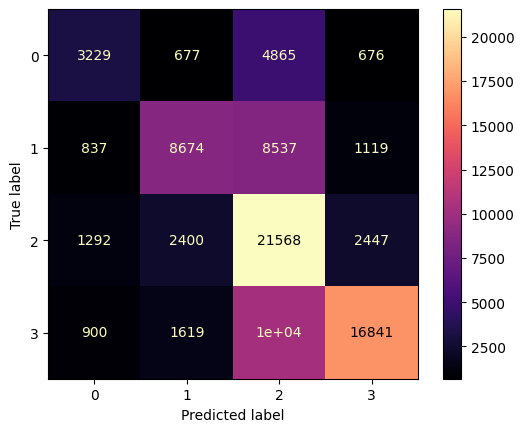

In [134]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [135]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/new_split/MLP2GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


Accuracy: 0.43582819229426145
Precision (Weighted): 0.38021897348230205
F1 Score (Weighted): 0.3430571407499202
F1 Score (Macro): 0.2009402870114531
              precision    recall  f1-score   support

           0       0.47      0.54      0.50      5286
           1       0.55      0.60      0.58      3071
           2       0.40      0.09      0.15      2602
           3       0.18      0.01      0.02      4150
           4       0.40      0.05      0.10      5638
           5       0.22      0.04      0.07      1738
           6       0.34      0.09      0.15      2439
           7       0.26      0.12      0.17      2916
           8       0.44      0.14      0.21      1066
           9       0.00      0.00      0.00      2345
          10       0.27      0.02      0.03      3788
          11       0.55      0.10      0.17      1437
          12       1.00      0.00      0.00       707
          13       0.26      0.01      0.03      1504
          14       0.00      0.00      0

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms


Best estimator (Emotion): MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=5, verbose=True), Best Score: 0.4037015481317658
Accuracy: 0.43582819229426145
Precision (Weighted): 0.38021897348230205
F1 Score (Weighted): 0.3430571407499202
F1 Score (Macro): 0.2009402870114531
              precision    recall  f1-score   support

           0       0.47      0.54      0.50      5286
           1       0.55      0.60      0.58      3071
           2       0.40      0.09      0.15      2602
           3       0.18      0.01      0.02      4150
           4       0.40      0.05      0.10      5638
           5       0.22      0.04      0.07      1738
           6       0.34      0.09      0.15      2439
           7       0.26      0.12      0.17      2916
           8       0.44      0.14      0.21      1066
           9       0.00      0.00      0.00      2345
          10       0.27      0.02      0.03      3788
          11     

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

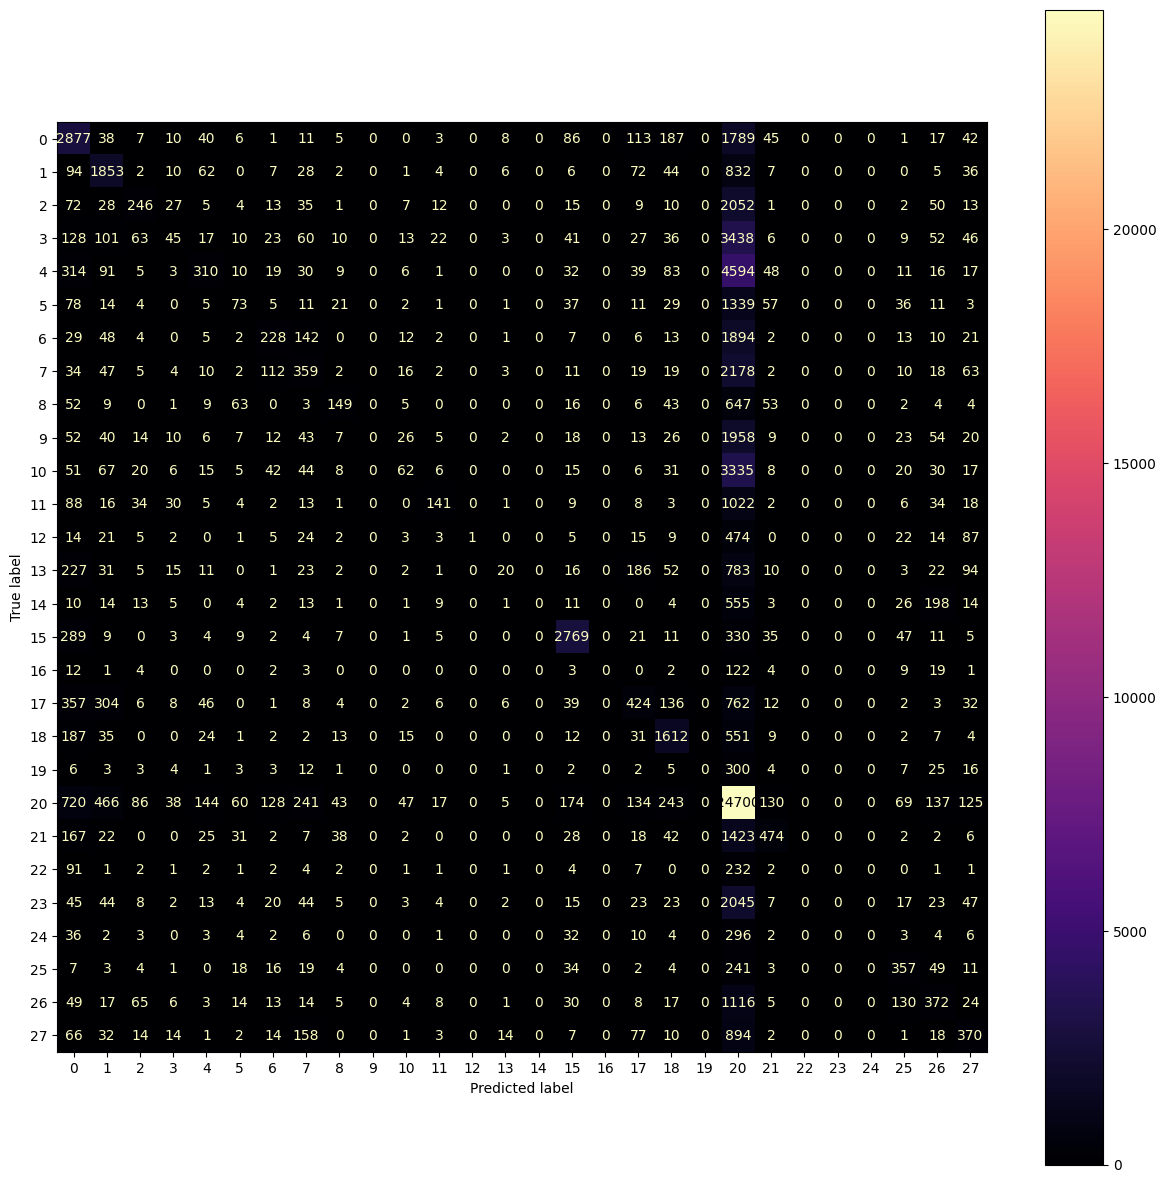

In [136]:
if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6021417762774998
Precision (Weighted): 0.601840581931771
F1 Score (Weighted): 0.5984936993316698
F1 Score (Macro): 0.5611253668407368
              precision    recall  f1-score   support

           0       0.51      0.32      0.39      9447
           1       0.59      0.57      0.58     19167
           2       0.53      0.61      0.57     27707
           3       0.71      0.70      0.70     29589

    accuracy                           0.60     85910
   macro avg       0.58      0.55      0.56     85910
weighted avg       0.60      0.60      0.60     85910

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=(5, 5),
              max_iter=5, verbose=True), Best Score: 0.5505296240251426


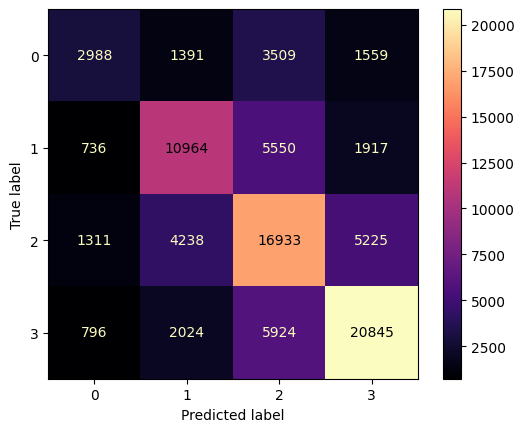

In [137]:
if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>3. Embedding as features</h3>

requires install of library gensim

pip install gensim

https://radimrehurek.com/gensim/models/word2vec.html


In [138]:
# result.most_similar("cat")

In [139]:
if (os.path.exists('models/word2vec.pickle')):
    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("word2vec-google-news-300")
    with open('models/word2vec.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)

pickle file used


In [140]:
nltk.download('punkt')
#post.str.lower()
tokenized_word = [word_tokenize(i) for i in post]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [141]:
post_tokens = [post_tokens for post_tokens in tokenized_word] #http://librarycarpentry.org/lc-tdm/aio/index.html
print("Number of tokens in Reddit posts:")
tokens_list = []
for i in post_tokens:
    for j in i:
        tokens_list.append(j)
print(len(tokens_list))

Number of tokens in Reddit posts:
2642128


In [142]:
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)

In [143]:
model = gensim.downloader.load("word2vec-google-news-300")

post_tokens_training = []

# Cleaning Google model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)


# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 

    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 



posts_tokens_in_model_test = [] 

# Cleaning Google model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) 


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [144]:
#Cleaning training and test sets
# RUN TWICE
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_emo_test))

# Remove empty posts
for i in range(len(X_embed_avg_train)):
    if i >= len(X_embed_avg_train):
        break
    if X_embed_avg_train[i].shape == (300,):
        continue
    else:
        X_embed_avg_train.pop(i)
        y_emo_train = np.delete(y_emo_train, i)
        y_sent_train = np.delete(y_sent_train, i)

# Remove empty posts
for i in range(len(X_embed_avg_test)):
    if i >= len(X_embed_avg_test):
        break
    if X_embed_avg_test[i].shape == (300,):
        continue
    else:
        X_embed_avg_test.pop(i)
        y_emo_test = np.delete(y_emo_test, i)
        y_sent_test = np.delete(y_sent_test, i)


print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_emo_test))

# Convert into np array
for i in range(len(X_embed_avg_train)):
    X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

for i in range(len(X_embed_avg_test)):
    X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (137388, 300)
Shape of test set: (34345, 300)
(34345,)


In [145]:
# classifier = MLPClassifier()
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [146]:
print(np.shape(X_embed_avg_train))
print(np.shape(y_emo_train))

(137388, 300)
(137388,)


Score for Emotions: 0.4041054010773038
Accuracy: 0.4041054010773038
Precision (Weighted): 0.3764164039126089
F1 Score (Weighted): 0.3079788190894019
F1 Score (Macro): 0.16627926301994275
              precision    recall  f1-score   support

           0       0.49      0.40      0.44      2213
           1       0.45      0.35      0.39      1167
           2       0.32      0.15      0.21      1052
           3       0.24      0.02      0.04      1672
           4       0.41      0.03      0.06      2195
           5       0.36      0.06      0.10       698
           6       0.46      0.01      0.03       972
           7       0.33      0.08      0.13      1169
           8       0.60      0.06      0.12       465
           9       0.30      0.01      0.02       907
          10       0.26      0.04      0.08      1512
          11       0.33      0.07      0.11       570
          12       0.00      0.00      0.00       278
          13       0.33      0.02      0.04       623
  

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

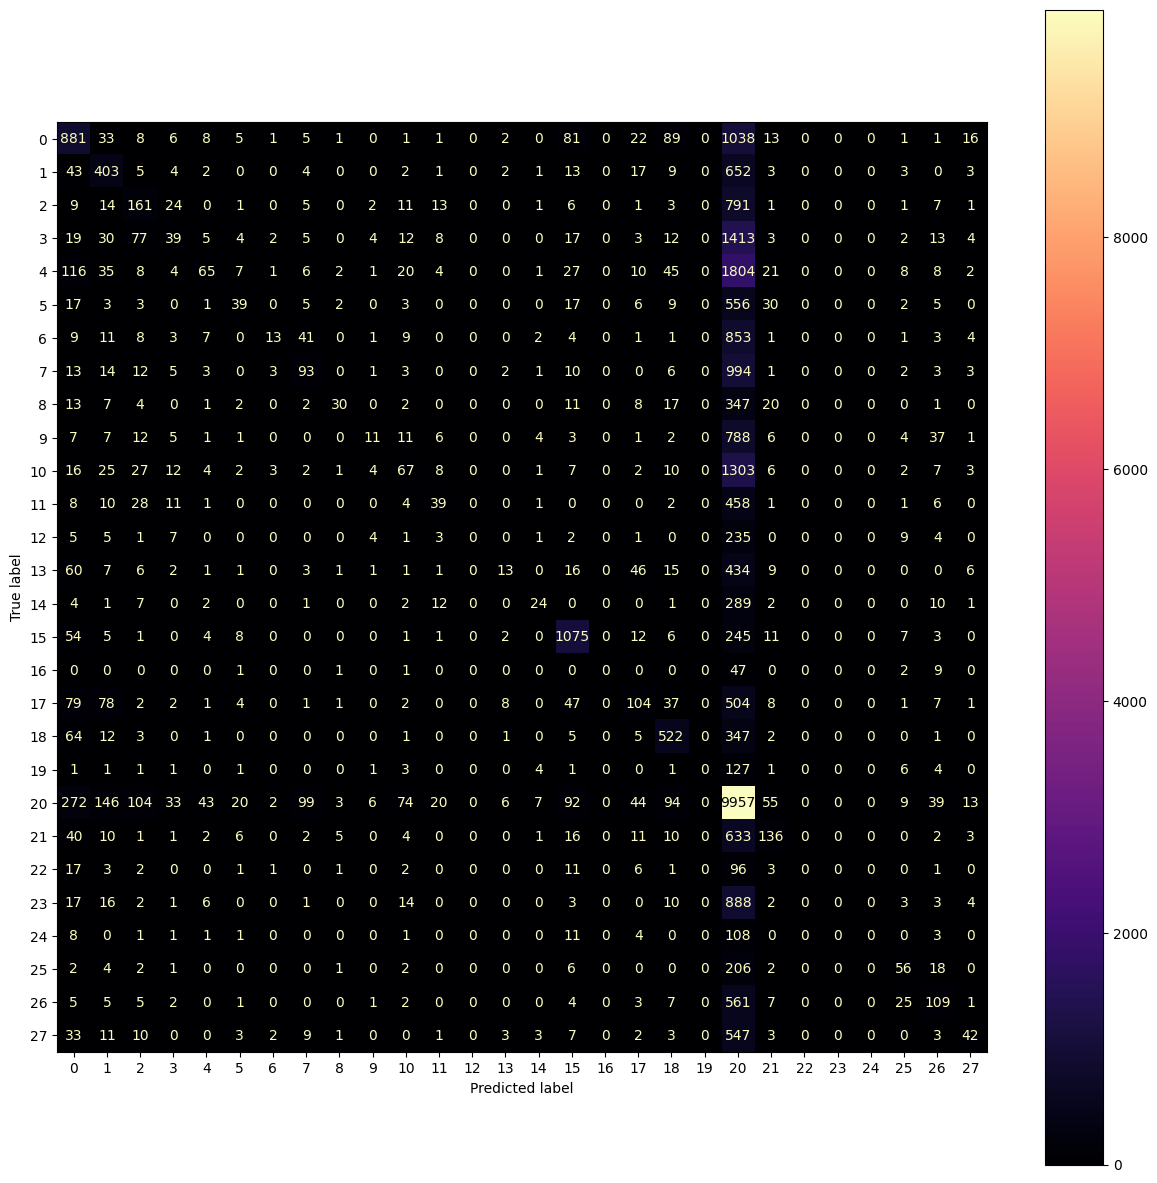

In [147]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.5394962876692386
Accuracy: 0.5394962876692386
Precision (Weighted): 0.5383351443769748
F1 Score (Weighted): 0.5235272912209554
F1 Score (Macro): 0.4658885260782834
              precision    recall  f1-score   support

           0       0.50      0.13      0.21      3794
           1       0.53      0.44      0.48      7599
           2       0.47      0.60      0.53     11138
           3       0.62      0.68      0.65     11814

    accuracy                           0.54     34345
   macro avg       0.53      0.46      0.47     34345
weighted avg       0.54      0.54      0.52     34345



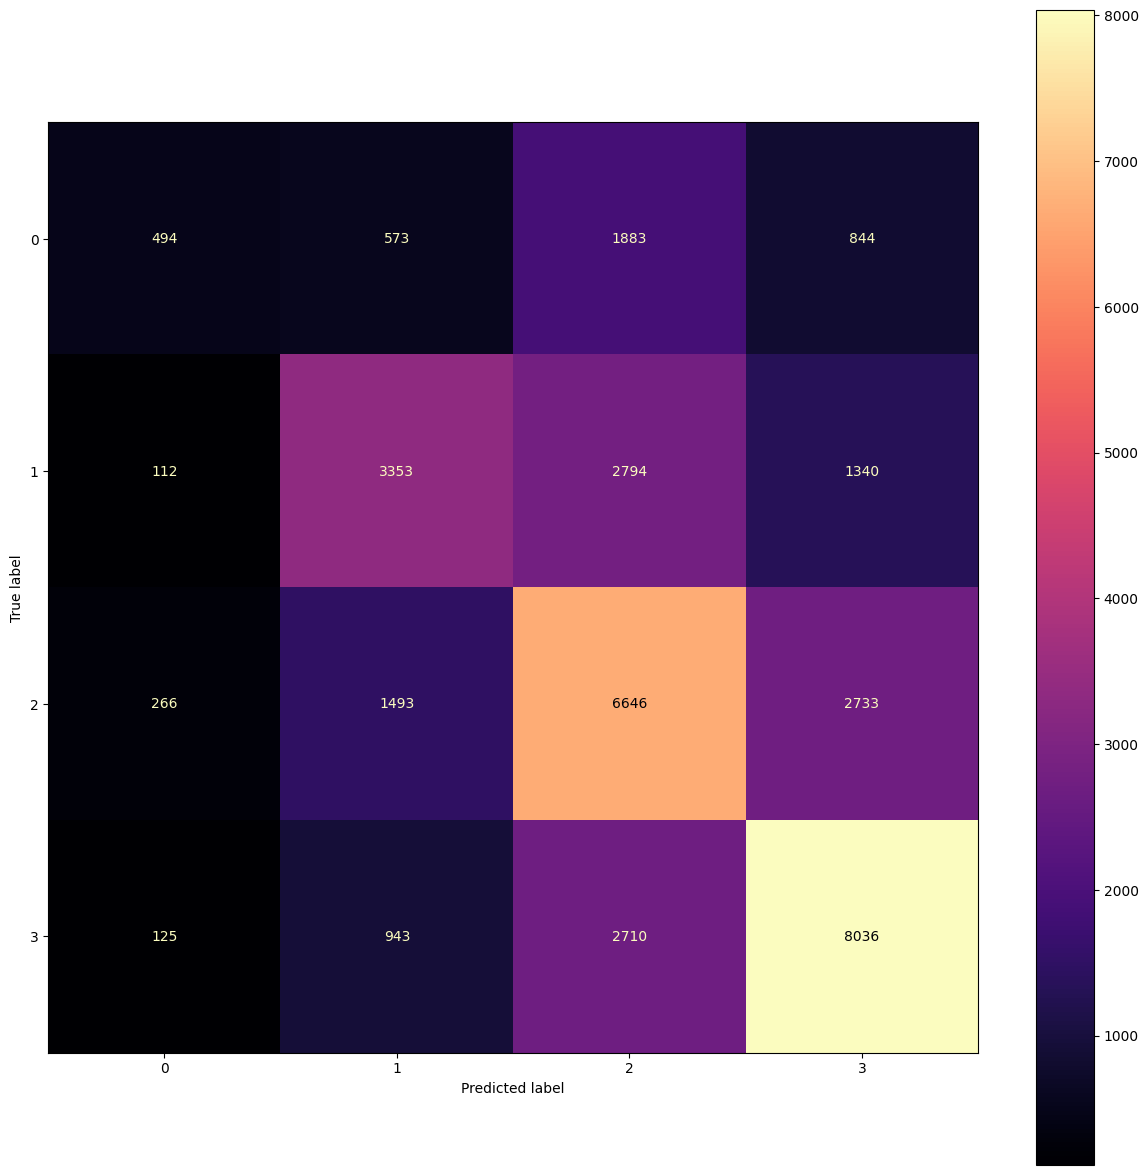

In [148]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [149]:
print(np.shape(X_embed_avg_train))

(137388, 300)


In [150]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

Iteration 1, loss = 2.73499578
Validation score: 0.330519
Iteration 2, loss = 2.49280505
Validation score: 0.358978
Iteration 3, loss = 2.40629499
Validation score: 0.366257
Iteration 4, loss = 2.35711625
Validation score: 0.371788
Iteration 5, loss = 2.32660298
Validation score: 0.374773


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.25911628
Validation score: 0.482204
Iteration 2, loss = 1.13929863
Validation score: 0.509062
Iteration 3, loss = 1.11016891
Validation score: 0.512337
Iteration 4, loss = 1.09873077
Validation score: 0.519616
Iteration 5, loss = 1.09383450
Validation score: 0.518160


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [151]:
if (os.path.exists('models/twitter.pickle')):
    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-twitter-100")
    with open('models/twitter.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)

[===-----------------------------------------------] 6.1% 23.4/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.3% 59.2/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.7% 88.0/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.0% 116.2/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.3% 144.3/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.2% 190.5/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.7% 219.5/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.2% 248.3/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.6% 277.3/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.1% 306.0/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.9% 340.3/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.3% 369.0/387.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 387.1/387.1MB downloaded


In [152]:
model = gensim.downloader.load("glove-twitter-100")
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)
post_tokens_training = [] 

# Cleaning Twitter model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)


# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
   
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 


posts_tokens_in_model_test = [] 

# Cleaning Twitter model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
    average_embeds_test.append(np.mean(token_embeddings,axis=0))


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [158]:
# Cleaning training and test sets
# RUN TWICE
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_emo_test))

# Remove empty posts
for i in range(len(X_embed_avg_train)):
    if i >= len(X_embed_avg_train):
        break
    if X_embed_avg_train[i].shape == (100,):
        continue
    else:
        X_embed_avg_train.pop(i)
        y_emo_train = np.delete(y_emo_train, i)
        y_sent_train = np.delete(y_sent_train, i)

# Remove empty posts
for i in range(len(X_embed_avg_test)):
    if i >= len(X_embed_avg_test):
        break
    if X_embed_avg_test[i].shape == (100,):
        continue
    else:
        X_embed_avg_test.pop(i)
        y_emo_test = np.delete(y_emo_test, i)
        y_sent_test = np.delete(y_sent_test, i)


print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_emo_test))

# Convert to np array
for i in range(len(X_embed_avg_train)):
    X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

for i in range(len(X_embed_avg_test)):
    X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34198, 100)
(34198,)
Shape of training set: (136731, 100)
Shape of test set: (34198, 100)
(34198,)


In [159]:
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_Twitter_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_Twitter_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_Twitter_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_Twitter_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Score for Emotions: 0.3663664541786069
Accuracy: 0.3663664541786069
Precision (Weighted): 0.3538406031743924
F1 Score (Weighted): 0.26026814689053746
F1 Score (Macro): 0.12292056329300442
              precision    recall  f1-score   support

           0       0.46      0.34      0.39      2080
           1       0.52      0.15      0.23      1232
           2       0.37      0.09      0.14      1067
           3       0.20      0.04      0.06      1653
           4       0.39      0.01      0.02      2298
           5       0.34      0.03      0.05       709
           6       0.38      0.01      0.02      1020
           7       0.37      0.20      0.26      1202
           8       0.50      0.03      0.06       461
           9       0.22      0.00      0.00       955
          10       0.26      0.01      0.03      1572
          11       0.33      0.06      0.11       534
          12       0.00      0.00      0.00       305
          13       0.29      0.02      0.04       595
 

C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

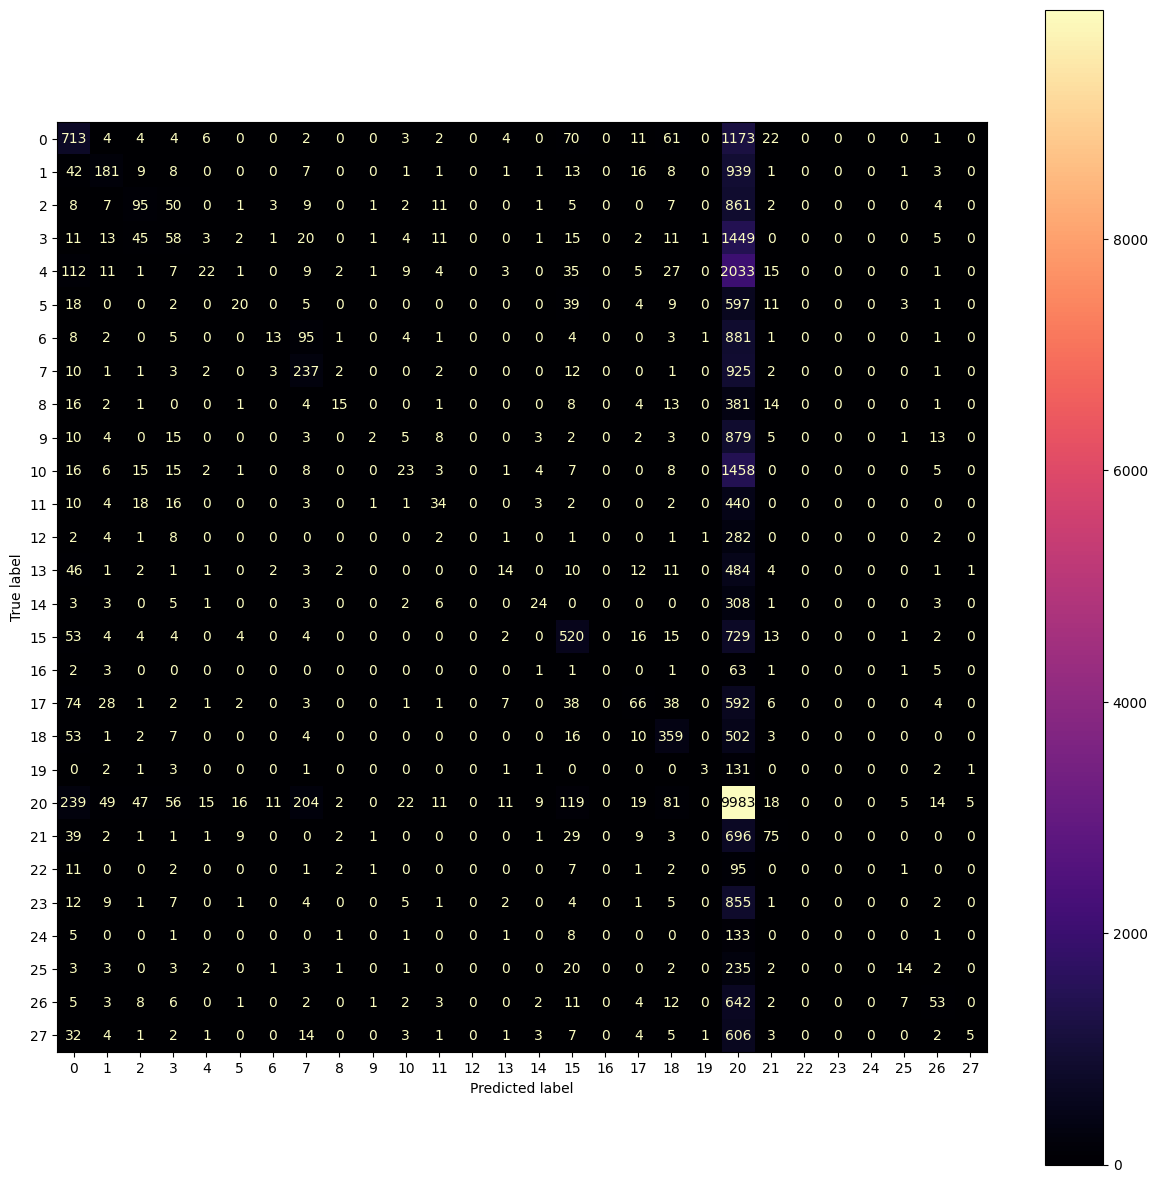

In [160]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.4903503128837944
Accuracy: 0.4903503128837944
Precision (Weighted): 0.502120222200101
F1 Score (Weighted): 0.480665079529174
F1 Score (Macro): 0.43540565944715093
              precision    recall  f1-score   support

           0       0.51      0.15      0.23      3827
           1       0.47      0.43      0.45      7725
           2       0.42      0.57      0.48     10936
           3       0.60      0.56      0.58     11710

    accuracy                           0.49     34198
   macro avg       0.50      0.43      0.44     34198
weighted avg       0.50      0.49      0.48     34198



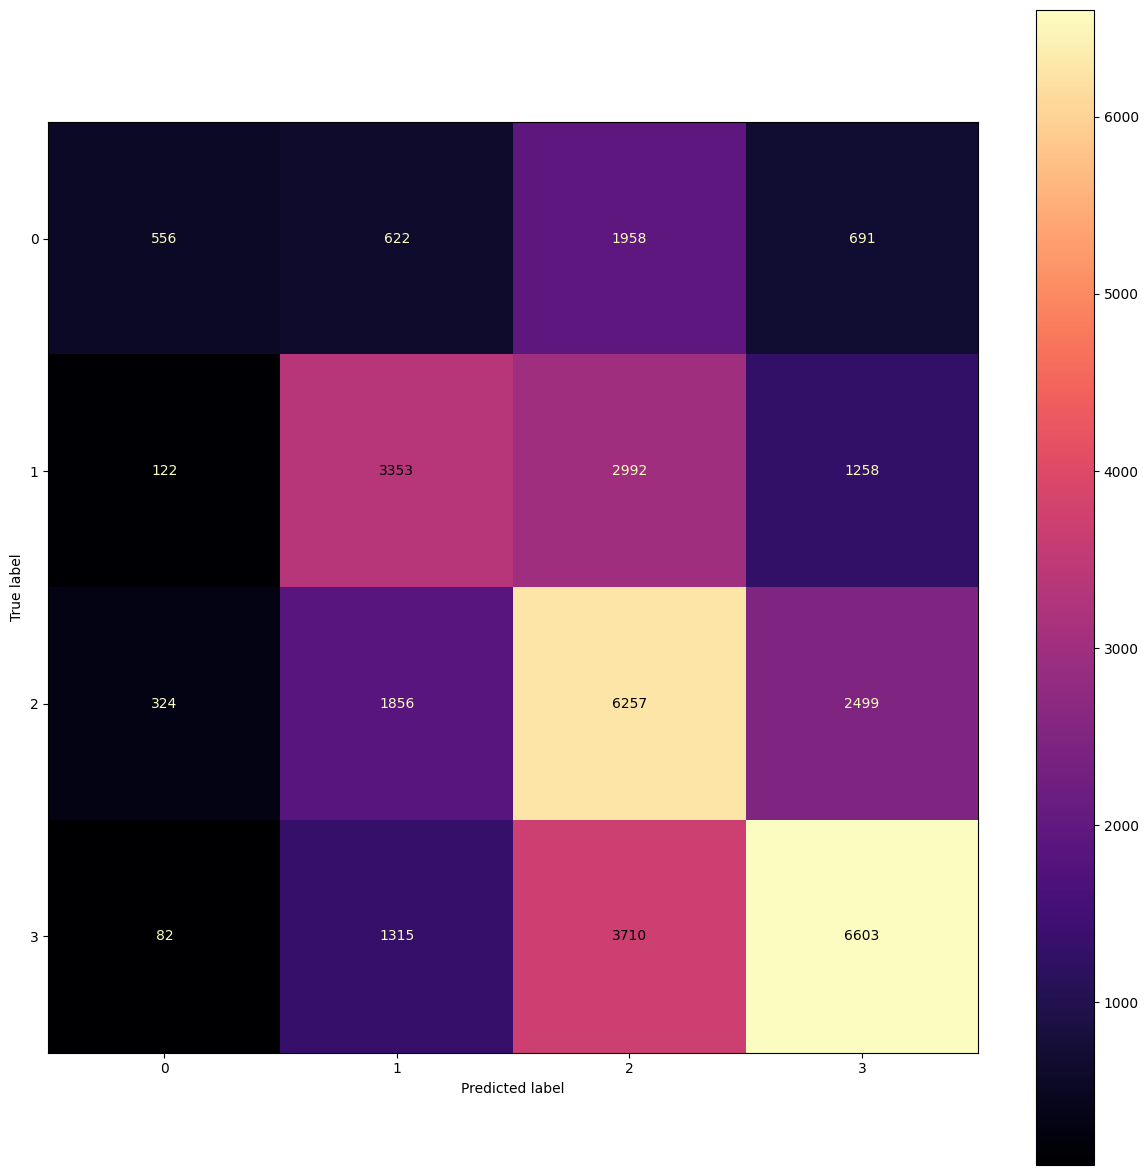

In [161]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [162]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_Twitter_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_Twitter_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

Iteration 1, loss = 2.77690621
Validation score: 0.333406
Iteration 2, loss = 2.52119012
Validation score: 0.336917
Iteration 3, loss = 2.49121003
Validation score: 0.337356
Iteration 4, loss = 2.47563472
Validation score: 0.338818
Iteration 5, loss = 2.46294558
Validation score: 0.341451


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.23967033
Validation score: 0.464092
Iteration 2, loss = 1.16310910
Validation score: 0.477695
Iteration 3, loss = 1.15111176
Validation score: 0.475062
Iteration 4, loss = 1.14691262
Validation score: 0.479084
Iteration 5, loss = 1.14486292
Validation score: 0.480766


C:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [163]:
if (os.path.exists('models/wiki.pickle')):
    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-wiki-gigaword-300")
    with open('models/wiki.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)

[===-----------------------------------------------] 6.2% 23.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.9% 52.1/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.5% 81.0/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.3% 117.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.7% 164.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.3% 193.1/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.6% 242.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.7% 284.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.4% 313.7/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.1% 342.5/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 376.1/376.1MB downloaded


In [164]:
model = gensim.downloader.load("glove-wiki-gigaword-300")
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)
post_tokens_training = [] 

# Cleaning Wiki model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)

    
# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
   
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 


posts_tokens_in_model_test = [] 
# Cleaning Wiki model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word])
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) 


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

IndentationError: unexpected indent (1071866394.py, line 6)

In [ ]:
#clean training and test sets
# RUN TWICE
for i in range(2):
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Remove empty posts
    for i in range(len(X_embed_avg_train)):
        if i >= len(X_embed_avg_train):
            break
        if X_embed_avg_train[i].shape == (300,):
            continue
        else:
            X_embed_avg_train.pop(i)
            y_emo_train = np.delete(y_emo_train, i)
            y_sent_train = np.delete(y_sent_train, i)

    # Remove empty posts
    for i in range(len(X_embed_avg_test)):
        if i >= len(X_embed_avg_test):
            break
        if X_embed_avg_test[i].shape == (300,):
            continue
        else:
            X_embed_avg_test.pop(i)
            y_emo_test = np.delete(y_emo_test, i)
            y_sent_test = np.delete(y_sent_test, i)


    print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Convert to np array
    for i in range(len(X_embed_avg_train)):
        X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

    for i in range(len(X_embed_avg_test)):
        X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

In [ ]:
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_Wiki_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_Wiki_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_Wiki_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_Wiki_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_Wiki_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_Wiki_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_Wiki_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_Wiki_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)

In [ ]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [ ]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [ ]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_Wiki_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_Wiki_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")